In [56]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
import pickle

import matplotlib.pyplot as plt
import numpy as np

In [58]:
def load_experiment_data(experiments):
    for v in experiments.values():
        with open(f"{v['dir']}/log.pkl", "rb") as f:
            v["data"] = pickle.load(f)

In [67]:
experiments = {
    "sqp": {"dir": "runs/penalty_sqp/run_1", "label": "SQP", "color": "tab:blue"},
    "gd": {"dir": "runs/gradient_descent/run_1", "label": "GD", "color": "tab:orange"},
    "ula": {"dir": "runs/ula/run_1", "label": "ULA", "color": "tab:green"},
    "mala": {"dir": "runs/mala/run_1", "label": "MALA", "color": "tab:red"},
    # "hmc": {"dir": "runs/qmh/run_1", "label": "QMH", "color": "tab:purple"},
    # "qmh": {"dir": "runs/qmh/run_1", "label": "QMH", "color": "tab:pink"},
}
load_experiment_data(experiments)

labels = [v["label"] for v in experiments.values()]
colors = [v["color"] for v in experiments.values()]

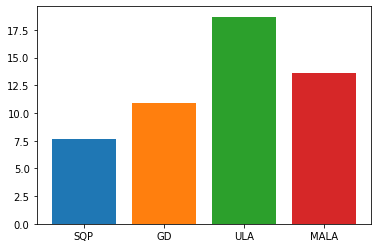

In [68]:
plt.bar(labels, [v["data"]["solve_time_seconds"] for v in experiments.values()], color=colors)
plt.show()

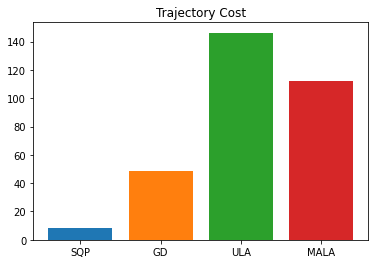

In [69]:
plt.title("Trajectory Cost")
plt.bar(labels, [v["data"]["trajectory_cost"]["total"] for v in experiments.values()], color=colors)
plt.show()

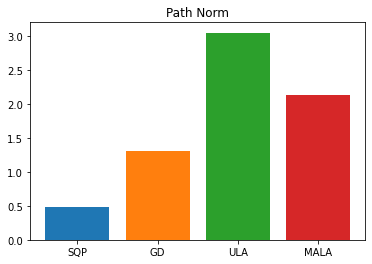

In [70]:
def path_length(algo):
    end_effector_poses = np.stack([r[0]["end_effector"] for r in experiments[algo]["data"]["run_results"]])
    return np.linalg.norm(np.diff(end_effector_poses, axis=0), axis=1).sum()

plt.title("Path Norm")
plt.bar(labels, [path_length(algo) for algo in experiments.keys()], color=colors)
plt.show()